# Assignment 2 - Wine Quality Prediction

## 1. Data Exploration

### 1.1 Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

wine = pd.read_csv("winequality-white.csv", delimiter=';')

### 1.2 Exploratory Data Analysis (EDA)

In [2]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


This dataset contains 11 features and 1 target:
- Features: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol
- Target: quality

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There are 4898 entries and all are numerical (long float and long integer). Plus there is no null value in all of the columns.

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


It seems like there are outliers in the residual sugar feature. We can see that 25% of the values are under 1.70 and 75% of them are under 9.90. Taking into account the mean at 6.39, the minimum value of 0.60 and maximum value of 65.80 seems like an outlier.

Using boxplot to visualize the outlier in residual sugar.

<AxesSubplot: xlabel='residual sugar'>

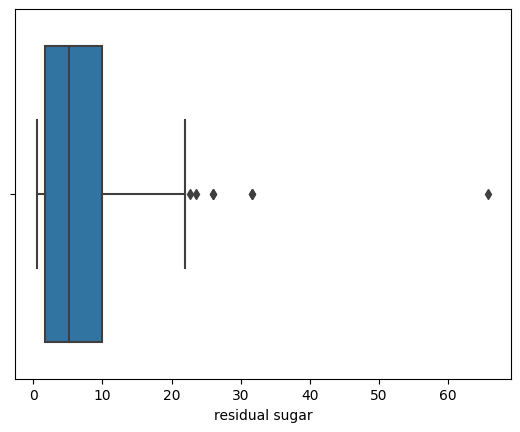

In [5]:
sns.boxplot(x=wine['residual sugar'])

It seems like residual sugar > 20 is considered outlier.

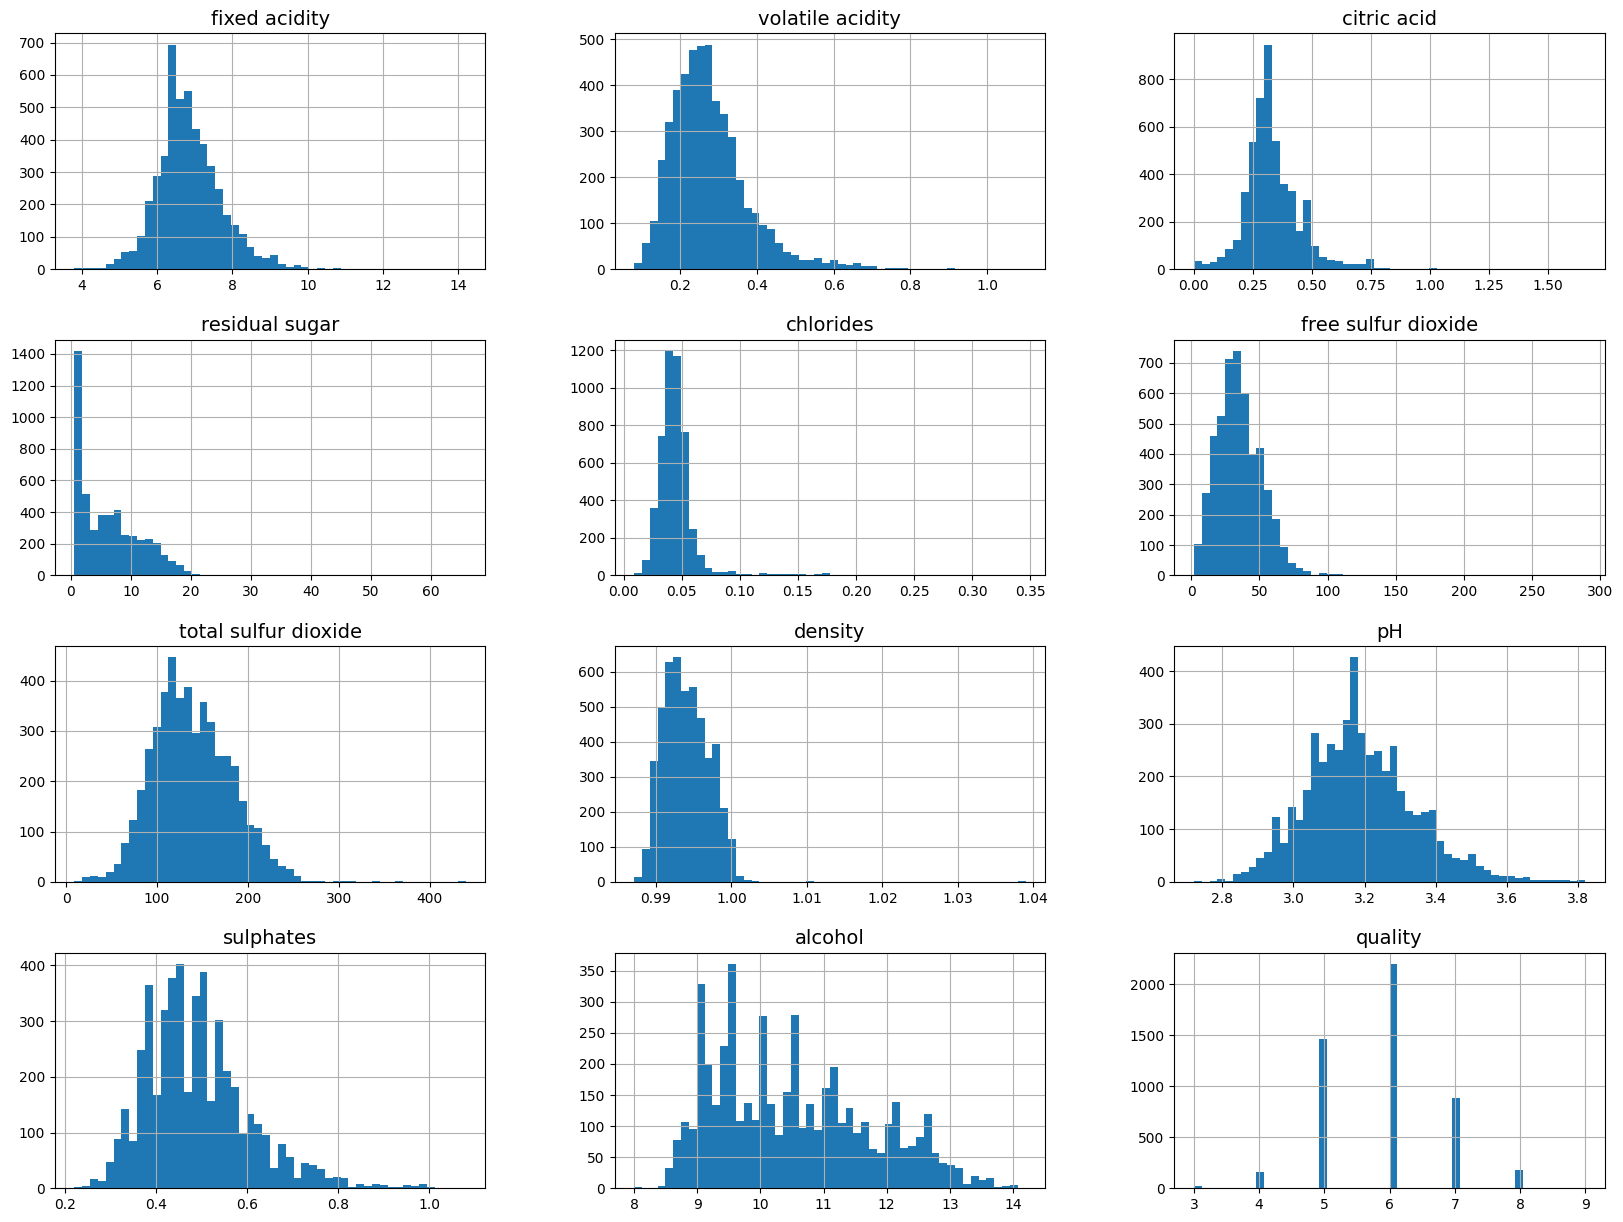

In [6]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
wine.hist(bins=50, figsize=(20,15))
plt.show()

Observations:
- most features are normally distributed except for residual sugar and alcohol
- a lot of features are skewed to the right (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density)
- from quality, we can see that we have data imbalance problem where we might not have enough samples of high quality wine.

Checking class imbalance.

In [7]:
wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

### 1.3 Visualize Correlation between Features and Target

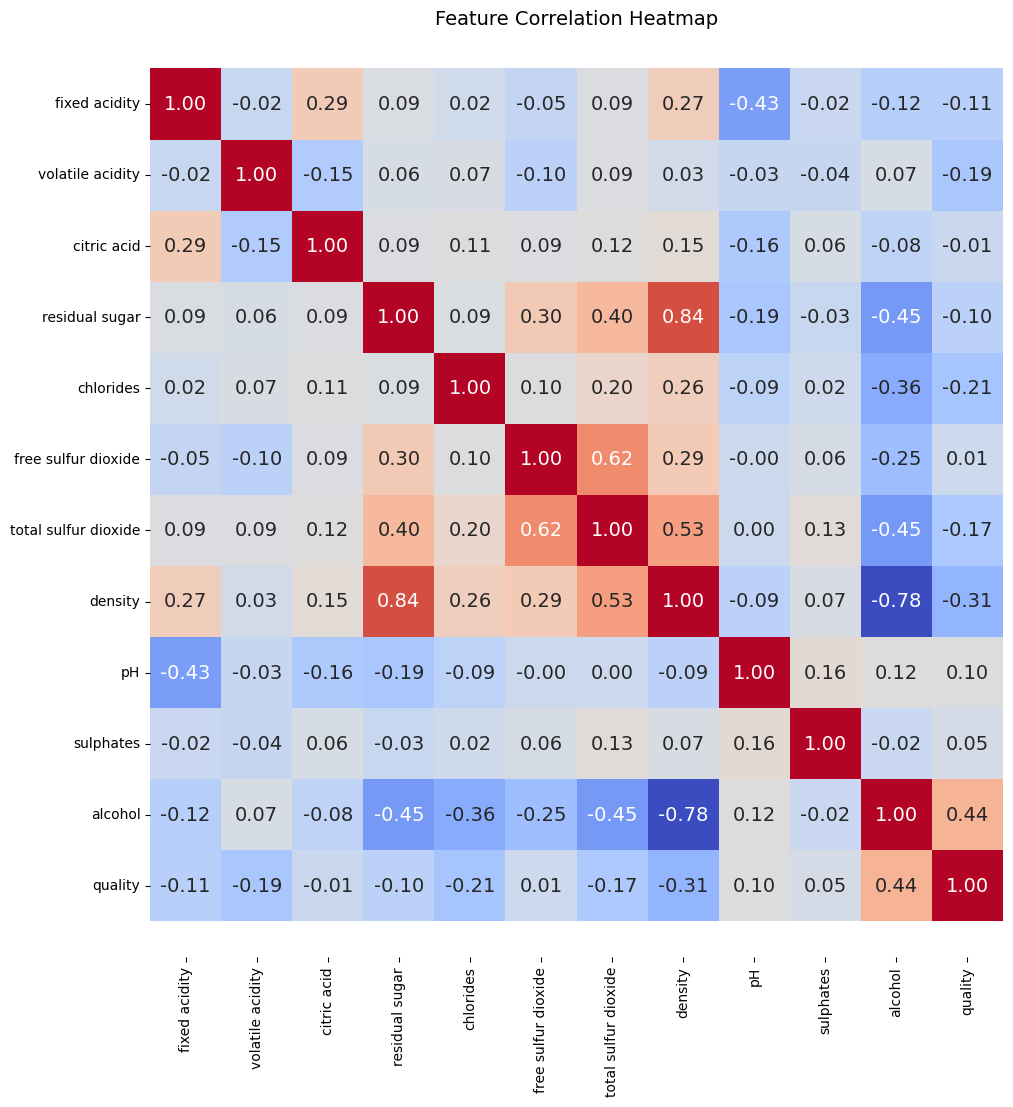

In [8]:
corr = wine.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=False)
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

We can see that alcohol has the highest correlation with the wine quality followed by density, chlorides, and volatile acidity.

## 2. Data Preprocessing

### 2.1 Handling Outliers

Using z-score to find and remove outliers with threshold set to 3.

In [9]:
z = np.abs(stats.zscore(wine))
wine = wine[(z < 3).all(axis=1)]
print(wine.shape)

wine['quality'].value_counts()

(4487, 12)


quality
6    2038
5    1309
7     855
8     161
4     124
Name: count, dtype: int64

After removing outliers, there are 4487 entries left. This means there are about 411 outliers (about 8.4%).

### 2.2 Split Features and Target

In [10]:
X = wine.drop('quality', axis=1)
print(X.shape)

y = wine['quality']
print(y.shape)

(4487, 11)
(4487,)


### 2.3 Perform Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### 2.4 Split Training and Test Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3589, 11)
(898, 11)
(3589,)
(898,)


## 3. Binary Classification

### 3.1 Categorizing Wine Quality

For binary classification task:
- high quality >= 7 quality rating
- low quality < 7 quality rating

In [13]:
y_train_hq = (y_train >= 7)
y_test_hq = (y_test >= 7)

### 3.2 Model Training

#### 3.2.1 Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train_hq)

LogisticRegression()

#### 3.2.2 Support Vector Machine (SVM)

In [15]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train, y_train_hq)

SVC(random_state=42)

#### 3.2.3 K-Nearest Neighbors (KNN)

Before training, lets see how the accuracy changed with number of K.

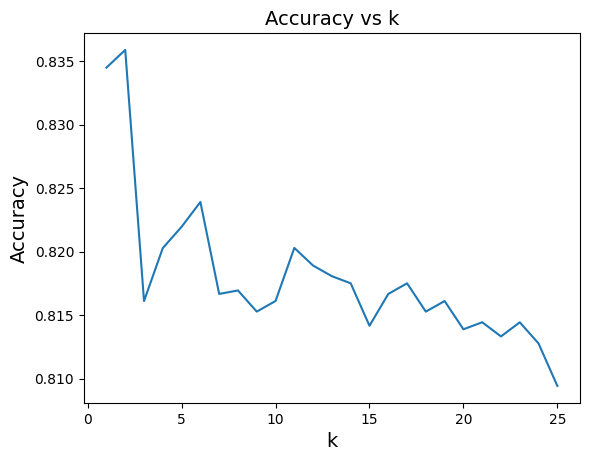

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Range of k from 1 to 26
k_range = range(1, 26)

# List of cv scores 
cv_scores = []

# Perform 10-fold cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train_hq, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs k
plt.plot(k_range, cv_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

We can see that highest accuracy is achieved when k equals to 2.

In [17]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train_hq)

KNeighborsClassifier(n_neighbors=2)

#### 3.2.4 Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train_hq)

DecisionTreeClassifier(random_state=42)

#### 3.2.5 Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_hq)

RandomForestClassifier(random_state=42)

### 3.3 Model Evaluation

In model evaluation, the trained model will be cross-validated using 10-fold and tested using the test set.

In [20]:
# Cross-validation using 10-fold with accuracy scoring
y_cv_logreg = cross_val_score(logreg, X_train, y_train_hq, cv=10, scoring='accuracy')
y_cv_svm = cross_val_score(svm, X_train, y_train_hq, cv=10, scoring='accuracy')
y_cv_knn = cross_val_score(knn, X_train, y_train_hq, cv=10, scoring='accuracy')
y_cv_dt = cross_val_score(dt, X_train, y_train_hq, cv=10, scoring='accuracy')
y_cv_rf = cross_val_score(rf, X_train, y_train_hq, cv=10, scoring='accuracy')

# Predict using the test set
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

#### 3.3.1 Evaluation of Logistic Regression

              precision    recall  f1-score   support

       False      0.824     0.934     0.875       695
        True      0.582     0.315     0.409       203

    accuracy                          0.794       898
   macro avg      0.703     0.625     0.642       898
weighted avg      0.769     0.794     0.770       898

Cross-validation accuracy score: 0.8013312895846626


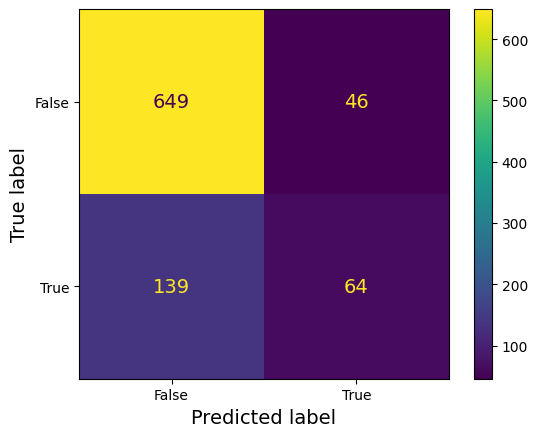

In [21]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test_hq, y_pred_logreg, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_logreg.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test_hq, y_pred_logreg)
plt.show()

#### 3.3.2 Evaluation of SVM

              precision    recall  f1-score   support

       False      0.840     0.944     0.889       695
        True      0.667     0.384     0.487       203

    accuracy                          0.817       898
   macro avg      0.753     0.664     0.688       898
weighted avg      0.801     0.817     0.798       898

Cross-validation accuracy score: 0.8183338261153732


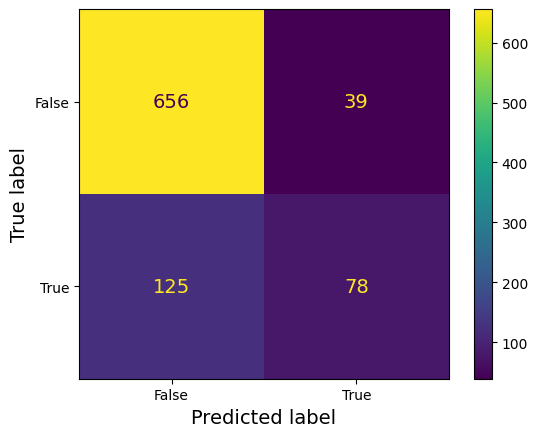

In [22]:
print(classification_report(y_test_hq, y_pred_svm, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_svm.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test_hq, y_pred_svm)
plt.show()

#### 3.3.3 Evaluation of KNN

              precision    recall  f1-score   support

       False      0.858     0.941     0.898       695
        True      0.699     0.468     0.560       203

    accuracy                          0.834       898
   macro avg      0.778     0.704     0.729       898
weighted avg      0.822     0.834     0.821       898

Cross-validation accuracy score: 0.835889575325625


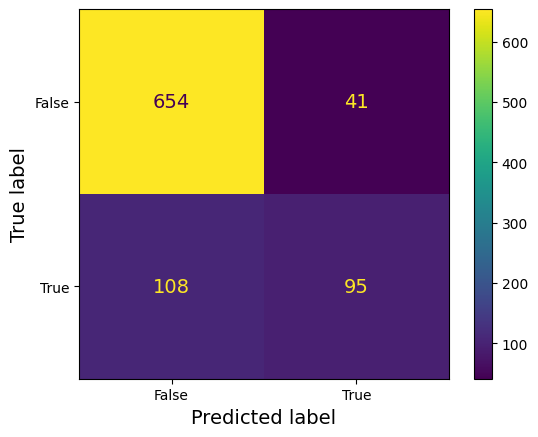

In [23]:
print(classification_report(y_test_hq, y_pred_knn, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_knn.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test_hq, y_pred_knn)
plt.show()

#### 3.3.4 Evaluation of Decision Tree

              precision    recall  f1-score   support

       False      0.893     0.845     0.868       695
        True      0.552     0.655     0.599       203

    accuracy                          0.802       898
   macro avg      0.723     0.750     0.734       898
weighted avg      0.816     0.802     0.807       898

Cross-validation accuracy score: 0.8339342680630553


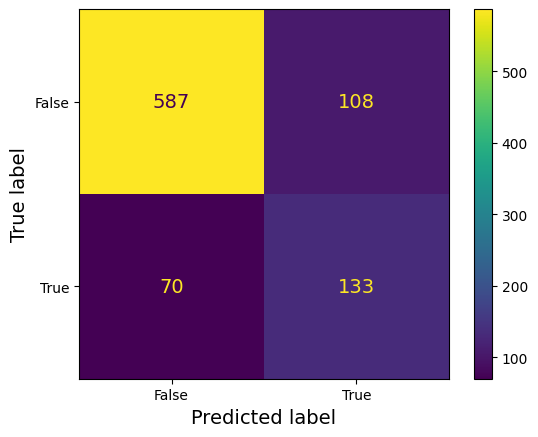

In [24]:
print(classification_report(y_test_hq, y_pred_dt, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_dt.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test_hq, y_pred_dt)
plt.show()

#### 3.3.5 Evaluation of Random Forest

              precision    recall  f1-score   support

       False      0.894     0.947     0.920       695
        True      0.772     0.616     0.685       203

    accuracy                          0.872       898
   macro avg      0.833     0.781     0.802       898
weighted avg      0.866     0.872     0.867       898

Cross-validation accuracy score: 0.873226373694776


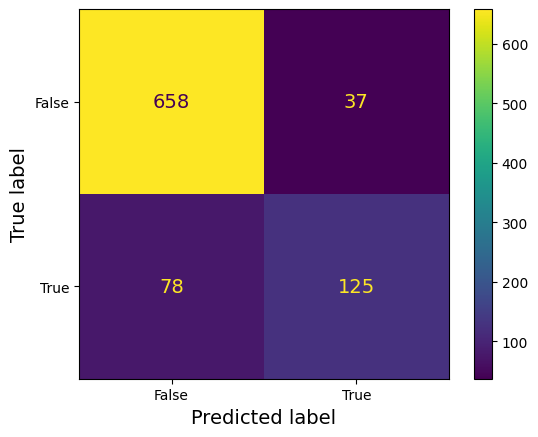

In [25]:
print(classification_report(y_test_hq, y_pred_rf, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_rf.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test_hq, y_pred_rf)
plt.show()

Ranking:
- CV Accuracy : RF, KNN, DT, SVM, LOGREG
- Precision   : RF, KNN, DT, SVM, LOGREG
- Recall      : RF, KNN, SVM, DT, LOGREG
- F1-Score    : RF, KNN, DT, SVM, LOGREG

Observations:
- Random Forest is the best at binary classification for this white wine quality prediction due to highest CV accuracy, precision, recall, and F1-score.
- However, Decision Tree is the best at recall high quality wine (minority class).

### 3.4 ROC Curve Analysis

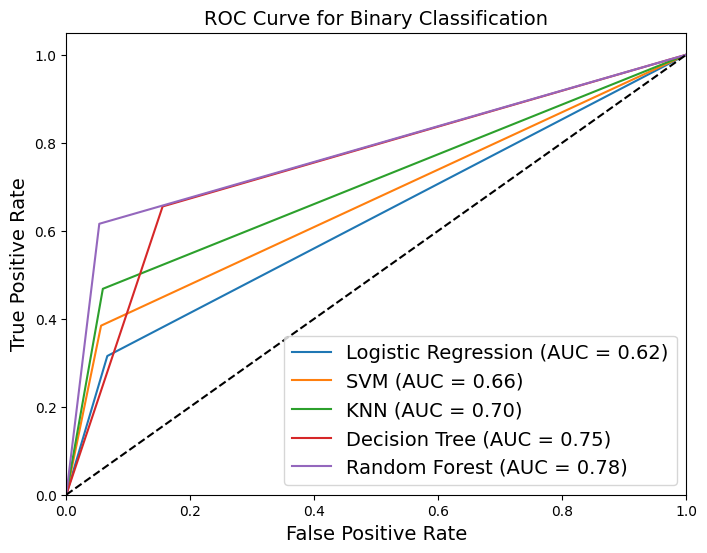

In [26]:
from sklearn.metrics import roc_curve, auc

models = [logreg, svm, knn, dt, rf]
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(8, 6))

# Plot ROC curve for each model
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test_hq, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc))

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")
plt.show()

From the ROC curve, we can observe that Random Forest have the highest ROC AUC which is 0.78. Although this value is quite low (ROC AUC = 1 being the perfect), it is the best we can achieved among the 5 chosen algorithms with imbalanced dataset.

### 3.5 Feature Importance for Binary Classification

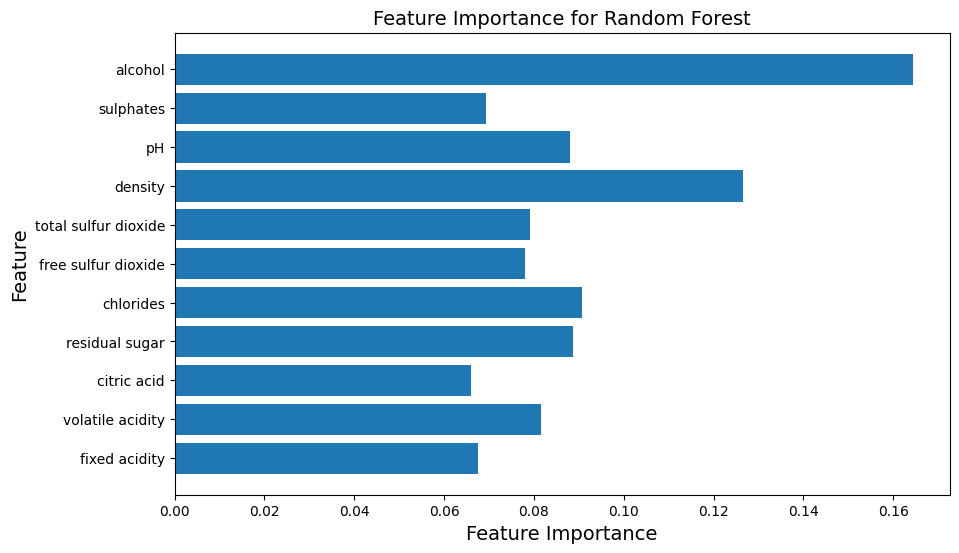

In [27]:
feature_importances = rf.feature_importances_

# Plot the feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(wine.columns[:-1], feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()

For binary classification, alcohol and density are the most important features to distinguish low quality wine and high quality wine (binary). This might not be the case for multiclass classification.

## 4. Multiclass Classification

### 4.1 Model Training

Logistic Regression and Support Vector Machine, by default, is limited to binary classification problems. However, we can utilize extensions like One-vs-One (OvO) and One-vs-Rest (OvR) to be used for multiclass classification problems. Other algorithms such as K-Nearest Neighbors, Decision Tree, and Random Forest inherently support multiclass classification.

#### 4.1.1 Logistic Regression

One-vs-One approach.

In [28]:
from sklearn.multiclass import OneVsOneClassifier

# One-vs-One
ovo_logreg = OneVsOneClassifier(LogisticRegression())
ovo_logreg.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression())

One-vs-Rest approach.

In [29]:
from sklearn.multiclass import OneVsRestClassifier

# One-vs-Rest
ovr_logreg = OneVsRestClassifier(LogisticRegression())
ovr_logreg.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

#### 4.1.2 Support Vector Machines (SVM)

One-vs-One approach.

In [30]:
ovo_svm = OneVsOneClassifier(SVC(random_state=42))
ovo_svm.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC(random_state=42))

One-vs-Rest approach.

In [31]:
ovr_svm = OneVsRestClassifier(SVC(random_state=42))
ovr_svm.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(random_state=42))

#### 4.1.3 K-Nearest Neighbors (KNN)

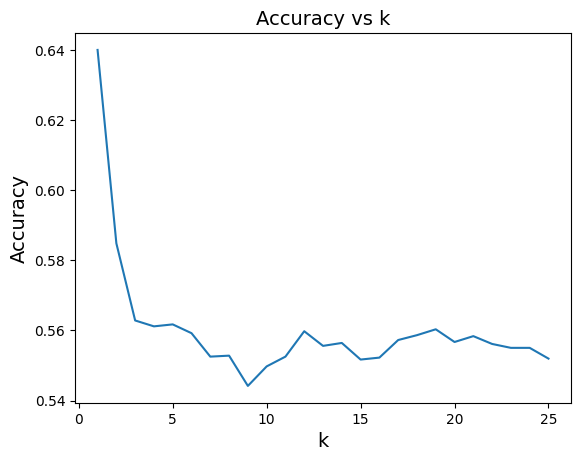

In [32]:
# Range of k from 1 to 26
k_range = range(1, 26)

# List of cv scores 
cv_scores = []

# Perform 10-fold cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs k
plt.plot(k_range, cv_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### 4.1.4 Decision Tree

In [34]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### 4.1.5 Random Forest

In [35]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4.2 Model Evaluation

For multiclass classification, it is recommended to find AUC score using cross validation method by passing roc_auc_ovr parameter. Evaluating the model with this method is advantageous when there is a high class imbalance. Also it does not require to set a classification threshold.

In [36]:
# Cross-validation using 10-fold with accuracy scoring
y_cv_ovo_logreg = cross_val_score(ovo_logreg, X_train, y_train, cv=10, scoring='accuracy')
y_cv_ovr_logreg = cross_val_score(ovr_logreg, X_train, y_train, cv=10, scoring='accuracy')
y_cv_ovo_svm = cross_val_score(ovo_svm, X_train, y_train, cv=10, scoring='accuracy')
y_cv_ovr_svm = cross_val_score(ovr_svm, X_train, y_train, cv=10, scoring='accuracy')
y_cv_knn = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
y_cv_dt = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
y_cv_rf = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')

# Predict using the test set
y_pred_ovo_logreg = ovo_logreg.predict(X_test)
y_pred_ovr_logreg = ovr_logreg.predict(X_test)
y_pred_ovo_svm = ovo_svm.predict(X_test)
y_pred_ovr_svm = ovr_svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

#### 4.2.1 Evaluation of Logistic Regression

One-vs-One.

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        25
           5      0.578     0.481     0.525       262
           6      0.527     0.752     0.620       408
           7      0.500     0.287     0.364       171
           8      1.000     0.000     0.000        32

    accuracy                          0.537       898
   macro avg      0.721     0.304     0.302       898
weighted avg      0.567     0.537     0.504       898

Cross-validation accuracy score: 0.5391473833273681


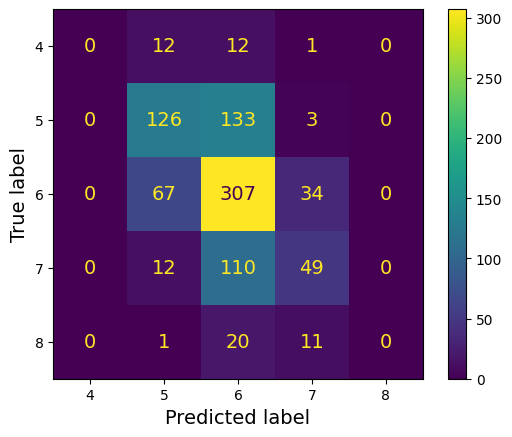

In [37]:
print(classification_report(y_test, y_pred_ovo_logreg, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_ovo_logreg.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ovo_logreg)
plt.show()

One-vs-Rest.

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        25
           5      0.583     0.481     0.527       262
           6      0.505     0.762     0.607       408
           7      0.515     0.199     0.287       171
           8      1.000     0.000     0.000        32

    accuracy                          0.524       898
   macro avg      0.721     0.288     0.284       898
weighted avg      0.561     0.524     0.484       898

Cross-validation accuracy score: 0.5469476043012091


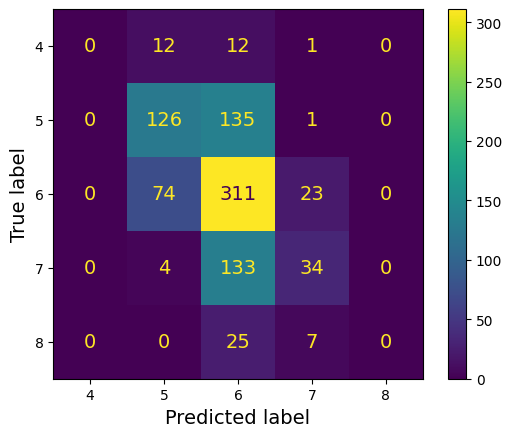

In [38]:
print(classification_report(y_test, y_pred_ovr_logreg, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_ovr_logreg.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ovr_logreg)
plt.show()

Although the OvR method achieved higher cross-validation accuracy, the OvO achieved better performance in all aspects (accuracy, precision, recall, f1-score) during testing.

#### 4.2.2 Evaluation of SVM

One-vs-One.

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        25
           5      0.610     0.561     0.584       262
           6      0.548     0.760     0.637       408
           7      0.571     0.304     0.397       171
           8      1.000     0.000     0.000        32

    accuracy                          0.567       898
   macro avg      0.746     0.325     0.324       898
weighted avg      0.599     0.567     0.535       898

Cross-validation accuracy score: 0.579545136241266


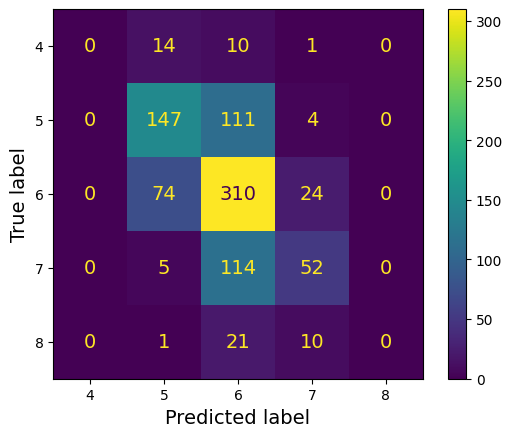

In [39]:
print(classification_report(y_test, y_pred_ovo_svm, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_ovo_svm.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ovo_svm)
plt.show()

One-vs-Rest.

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        25
           5      0.610     0.580     0.595       262
           6      0.554     0.728     0.629       408
           7      0.527     0.339     0.413       171
           8      1.000     0.094     0.171        32

    accuracy                          0.568       898
   macro avg      0.738     0.348     0.362       898
weighted avg      0.594     0.568     0.544       898

Cross-validation accuracy score: 0.5739756617544078


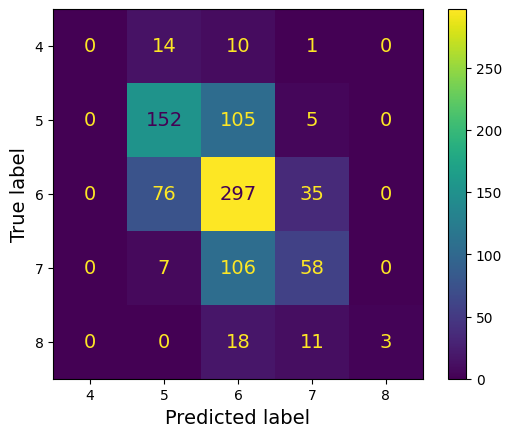

In [40]:
print(classification_report(y_test, y_pred_ovr_svm, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_ovr_svm.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ovr_svm)
plt.show()

SVM however achieved better performance using the OvR method. Plus, it is the first time a model is able to predict samples with quality class 8.

#### 4.2.3 Evaluation of KNN

              precision    recall  f1-score   support

           4      0.385     0.400     0.392        25
           5      0.640     0.645     0.643       262
           6      0.666     0.610     0.637       408
           7      0.591     0.667     0.626       171
           8      0.390     0.500     0.438        32

    accuracy                          0.621       898
   macro avg      0.534     0.564     0.547       898
weighted avg      0.626     0.621     0.623       898

Cross-validation accuracy score: 0.6400164952303885


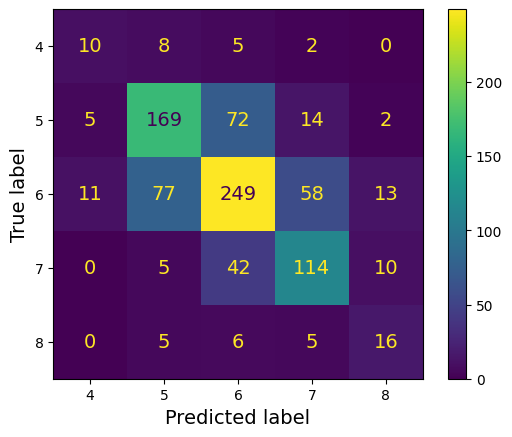

In [41]:
print(classification_report(y_test, y_pred_knn, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_knn.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.show()

#### 4.2.4 Evaluation of Decision Tree

              precision    recall  f1-score   support

           4      0.455     0.400     0.426        25
           5      0.629     0.634     0.631       262
           6      0.662     0.637     0.649       408
           7      0.560     0.596     0.578       171
           8      0.324     0.375     0.348        32

    accuracy                          0.612       898
   macro avg      0.526     0.528     0.526       898
weighted avg      0.615     0.612     0.613       898

Cross-validation accuracy score: 0.6154946234885856


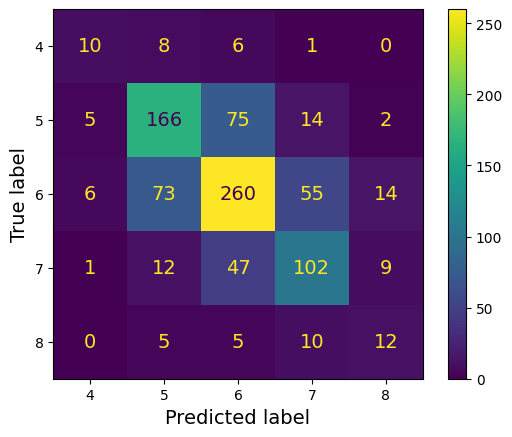

In [42]:
print(classification_report(y_test, y_pred_dt, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_dt.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.show()

#### 4.2.5 Evaluation of Random Forest

              precision    recall  f1-score   support

           4      1.000     0.320     0.485        25
           5      0.733     0.649     0.688       262
           6      0.640     0.767     0.698       408
           7      0.647     0.591     0.618       171
           8      0.923     0.375     0.533        32

    accuracy                          0.673       898
   macro avg      0.789     0.540     0.604       898
weighted avg      0.689     0.673     0.668       898

Cross-validation accuracy score: 0.6904452156051104


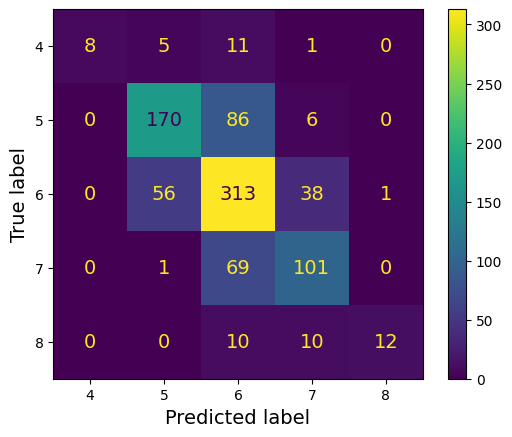

In [43]:
print(classification_report(y_test, y_pred_rf, digits=3, zero_division=1))
print('Cross-validation accuracy score:', y_cv_rf.mean())

plt.rc('font', size=14)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

Random forest is the best algorithm for the multiclass classification of wine quality. It achieved the highest cross-validation accuracy, testing accuracy, precision, recall, and f1-score. However, decision tree is better at recall for minority classes. This is the exact case as in binary classification. 

### 4.3 Feature Importance for Multiclass Classification

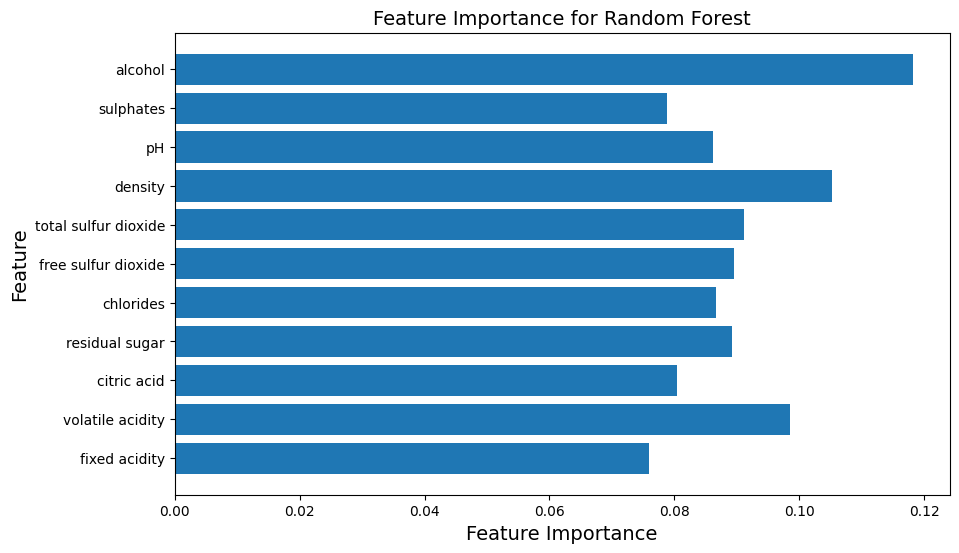

In [44]:
feature_importances = rf.feature_importances_

# Plot the feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(wine.columns[:-1], feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()

For multiclass classification, alcohol and density are still the most important features as in binary classification. However, we can also see that volatile acidity has high importance during training.